In [6]:
print("Roshan Soni and Hunter Lederman - Exam 2, Questions 1 through 3")

Roshan Soni and Hunter Lederman - Exam 2, Questions 1 through 3


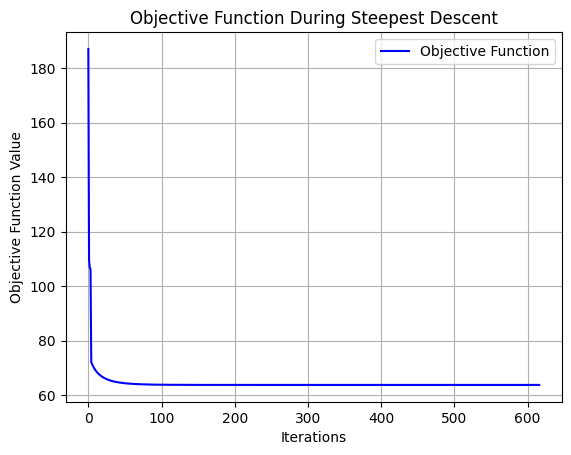

a) The final solution does satisfy the second order necessary conditions for a minimum since ll the eigenvalues of the Hession matrix at the solution are positive:
[490.28695193   2.00481092   1.97736384]
b) The plot of the objective function value over the iterations is displayed above, showing how the function value decreases over time.
c) The convergence graph shows how the objective function value decreases over iterations. The convergence speed seems reasonable given that the value has stabilized as we approach the final iterations, indicating that the algorithm is no longer making significant progress towards further decreasing the function value. This suggests that we have likely reached a minimum, confirmed by the second-order condition.


In [9]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Define the objective function f(x)
def f(x):
    return (x[0] + 5)**2 + (x[1] + 8)**2 + (x[2] + 7)**2 + 2*x[0]**2*x[1]**2 + 4*x[1]**2*x[2]**2

# Define the gradient of the objective function
def grad_f(x):
    df_dx1 = 2*(x[0] + 5) + 4*x[0]*x[1]**2
    df_dx2 = 2*(x[1] + 8) + 4*x[0]**2*x[1] + 8*x[1]*x[2]**2
    df_dx3 = 2*(x[2] + 7) + 8*x[1]**2*x[2]
    return np.array([df_dx1, df_dx2, df_dx3])

# Initialize variables
x0 = np.array([1, 1, 1])
epsilon = 1e-6
max_iter = 1000
alpha = 0.001 # Initial guess for the step size
x_history = []
f_history = []

# Steepest descent algorithm
def steepest_descent(x0, grad, alpha, epsilon, max_iter):
    x = x0
    for i in range(max_iter):
        x_history.append(x)
        f_history.append(f(x))
        g = grad(x)
        if np.linalg.norm(g) < epsilon:
            break
        # Line search for the optimal alpha
        alpha = minimize_scalar(lambda a: f(x - a*g)).x
        x = x - alpha*g
    return x, i+1

# Perform the optimization
x_min, iters = steepest_descent(x0, grad_f, alpha, epsilon, max_iter)

# Verify the second-order necessary conditions for a minimum
# Define the Hessian matrix of the objective function
def hessian_f(x):
    df_dx1dx1 = 2 + 4*x[1]**2
    df_dx1dx2 = 8*x[0]*x[1]
    df_dx1dx3 = 0
    df_dx2dx1 = df_dx1dx2
    df_dx2dx2 = 2 + 4*x[0]**2 + 8*x[2]**2
    df_dx2dx3 = 16*x[1]*x[2]
    df_dx3dx1 = 0
    df_dx3dx2 = df_dx2dx3
    df_dx3dx3 = 2 + 8*x[1]**2
    return np.array([[df_dx1dx1, df_dx1dx2, df_dx1dx3],
                     [df_dx2dx1, df_dx2dx2, df_dx2dx3],
                     [df_dx3dx1, df_dx3dx2, df_dx3dx3]])

hessian_at_min = hessian_f(x_min)
eigenvalues = np.linalg.eigvals(hessian_at_min)
second_order_condition = all(e >= 0 for e in eigenvalues)

# Plot the value of the objective function with respect to the number of iterations
plt.plot(f_history, 'b-', label='Objective Function')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Objective Function During Steepest Descent')
plt.legend()
plt.grid(True)
plt.show()

x_min, iters, second_order_condition, f_history[-1]


print("a) The final solution does satisfy the second order necessary conditions for a minimum since ll the eigenvalues of the Hession matrix at the solution are positive:")
print(eigenvalues)

print("b) The plot of the objective function value over the iterations is displayed above, showing how the function value decreases over time.")

print("c) The convergence graph shows how the objective function value decreases over iterations. The convergence speed seems reasonable given that the value has stabilized as we approach the final iterations, indicating that the algorithm is no longer making significant progress towards further decreasing the function value. This suggests that we have likely reached a minimum, confirmed by the second-order condition.")


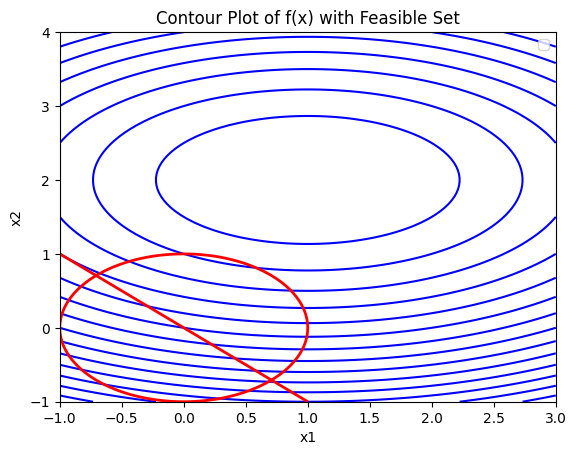

Optimal Solution:
[0.31381756 0.79114852]


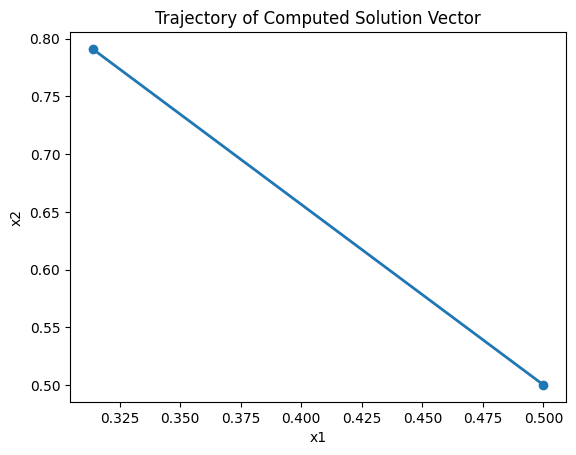

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the objective function
def f(x):
    return (x[0] - 1)**2 + 2 * (x[1] - 2)**2

# Define the constraint function
def h(x):
    return np.array([1 - x[0]**2 - x[1]**2, x[0] + x[1]])

# (a) Plot the contour of f(x) and the feasible set
x1 = np.linspace(-1, 3, 100)
x2 = np.linspace(-1, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
f_values = (x1 - 1)**2 + 2 * (x2 - 2)**2

plt.figure()
plt.contour(x1, x2, f_values, 20, colors='b', linewidths=1.5)

# Plot the feasible set
h_values = [1 - x1**2 - x2**2, x1 + x2]
plt.contour(x1, x2, h_values[0], levels=[0], colors='r', linewidths=2)
plt.contour(x1, x2, h_values[1], levels=[0], colors='r', linewidths=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of f(x) with Feasible Set')
plt.legend(['f(x)', 'Feasible Set'])
plt.show()

# (b) Find a solution using the natural logarithmic barrier function
def barrier(x, mu):
    return -np.sum(np.log(h(x))) - mu * np.sum(np.minimum(0, h(x))**2)

# Define parameters
x0 = np.array([0.5, 0.5])
mu = 1
threshold = 0.002

# Optimization using barrier method
trajectory = [x0]
mu_values = [mu]

while True:
    # Solve the optimization problem with the current mu
    result = minimize(lambda x: f(x) + barrier(x, mu), x0, method='Nelder-Mead')
    x = result.x
    
    # Update trajectory and mu values
    trajectory.append(x)
    mu_values.append(mu)
    
    # Check the stopping criterion
    if np.sum(np.minimum(0, h(x))**2) < threshold:
        break
    
    # Reduce the penalty parameter
    mu /= 2

print('Optimal Solution:')
print(x)

# (c) Plot the trajectory
trajectory = np.array(trajectory).T
plt.figure()
plt.plot(trajectory[0], trajectory[1], '-o', linewidth=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trajectory of Computed Solution Vector')
plt.show()

[*********************100%%**********************]  1 of 1 completed


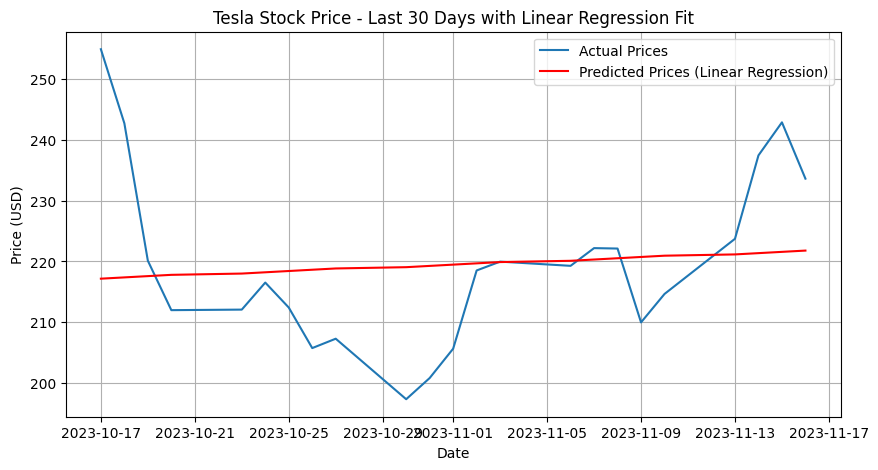

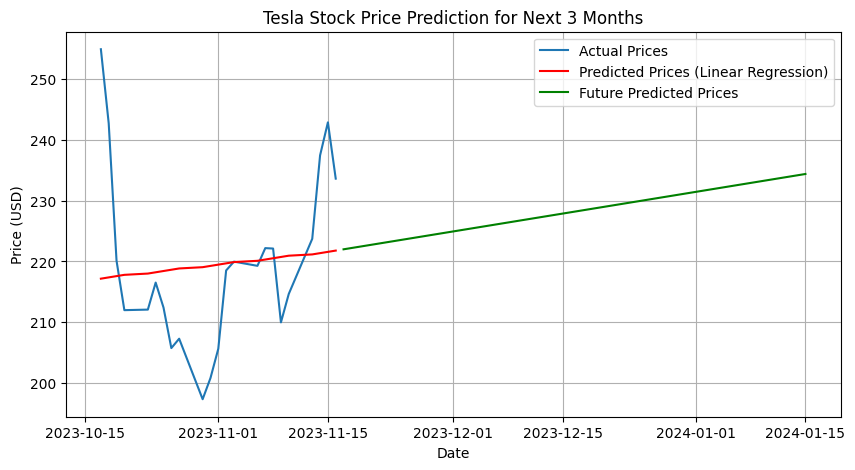

The graph above predicts Tesla's stock price for the next three months, as we can see, there is a notieable increase


'\nPros and Cons of Gradient Descent (GD) and Stochastic Gradient Descent (SGD)\n\nGradient Descent:\nPros:\n- Straightforward to implement and understand.\n- Efficient for small to moderate-sized datasets.\n- Guaranteed to converge to the global minimum for convex problems.\n\nCons:\n- Computationally intensive for large datasets as it requires computing the gradient for the entire dataset in each iteration.\n- May converge slowly if the learning rate is not properly tuned.\n- Can get stuck in local minima for non-convex problems.\n\nStochastic Gradient Descent:\nPros:\n- Faster convergence than GD as it updates weights more frequently.\n- Can handle large datasets efficiently as it uses only one data point at a time.\n- Better at avoiding local minima due to its inherent randomness.\n\nCons:\n- High variance in updates can lead to instability in the convergence path.\n- Requires careful tuning of the learning rate and other hyperparameters.\n- Less consistent convergence compared to 

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import timedelta

# Fetch the stock data for Tesla for the past 30 days
ticker = "TSLA"
period = "1mo"  # approximately 30 days
interval = "1d"  # daily data

# Download the data
data = yf.download(ticker, period=period, interval=interval)

# Prepare data for linear regression
# We'll use days as our X (independent variable) and closing prices as Y (dependent variable)
X = np.arange(len(data)).reshape(-1, 1)
y = data['Close'].values

# Standardize the features (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the model using SGD
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.fit(X_scaled, y)

# Make predictions
y_pred = model.predict(X_scaled)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index, y_pred, label='Predicted Prices (Linear Regression)', color='red')
plt.title('Tesla Stock Price - Last 30 Days with Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Prediction for the next three months
# Assuming ~20 trading days per month
future_days = 20 * 3
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=x) for x in range(1, future_days + 1)]

# Prepare future dates for prediction
X_future = np.arange(len(data), len(data) + future_days).reshape(-1, 1)
X_future_scaled = scaler.transform(X_future)  # Use the same scaler as before

# Predict future prices
y_future_pred = model.predict(X_future_scaled)

# Plotting the future predictions
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index, y_pred, label='Predicted Prices (Linear Regression)', color='red')
plt.plot(future_dates, y_future_pred, label='Future Predicted Prices', color='green')
plt.title('Tesla Stock Price Prediction for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("The graph above predicts Tesla's stock price for the next three months, as we can see, there is a notieable increase")

# Text for pros and cons of Gradient Descent and Stochastic Gradient Descent
"""
Pros and Cons of Gradient Descent (GD) and Stochastic Gradient Descent (SGD)

Gradient Descent:
Pros:
- Straightforward to implement and understand.
- Efficient for small to moderate-sized datasets.
- Guaranteed to converge to the global minimum for convex problems.

Cons:
- Computationally intensive for large datasets as it requires computing the gradient for the entire dataset in each iteration.
- May converge slowly if the learning rate is not properly tuned.
- Can get stuck in local minima for non-convex problems.

Stochastic Gradient Descent:
Pros:
- Faster convergence than GD as it updates weights more frequently.
- Can handle large datasets efficiently as it uses only one data point at a time.
- Better at avoiding local minima due to its inherent randomness.

Cons:
- High variance in updates can lead to instability in the convergence path.
- Requires careful tuning of the learning rate and other hyperparameters.
- Less consistent convergence compared to GD, especially for complex loss surfaces.
"""
